In [224]:
import pandas as pd  # Import thư viện pandas và đặt tên ngắn gọn là 'pd' để sử dụng các chức năng liên quan đến dữ liệu.
import warnings  # Import thư viện warnings để có thể tắt các cảnh báo sau này nếu cần.
import random  # Import thư viện random để tạo số ngẫu nhiên.
import matplotlib.pyplot as plt  # Import thư viện matplotlib để vẽ biểu đồ và đặt tên tắt là 'plt'.
import seaborn as sns  # Import thư viện seaborn để tạo các biểu đồ thống kê đẹp mắt.
from sklearn.preprocessing import StandardScaler  # Import chức năng StandardScaler từ thư viện sklearn để chuẩn hóa dữ liệu.
from sklearn.model_selection import train_test_split  # Import chức năng train_test_split để chia dữ liệu thành tập huấn luyện và tập kiểm tra.
from sklearn.neighbors import KNeighborsClassifier  # Import mô hình K-Nearest Neighbors (KNN) từ sklearn.
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score  # Import các hàm đánh giá hiệu suất cho mô hình.
import numpy as np  # Import thư viện numpy và đặt tên ngắn gọn là 'np' để làm việc với mảng số học.
import joblib  # Import thư viện joblib để lưu và tải mô hình máy học.
from sklearn.tree import DecisionTreeClassifier  # Import mô hình Decision Tree từ sklearn.
from sklearn.ensemble import RandomForestClassifier  # Import mô hình Random Forest từ sklearn.
import tensorflow as tf  # Import thư viện TensorFlow cho việc làm việc với mạng nơ-ron.
from tensorflow import keras  # Import thư viện keras từ TensorFlow.
from tensorflow.keras import layers  # Import chức năng layers từ keras để xây dựng mạng nơ-ron.
from tensorflow.keras.models import load_model  # Import chức năng load_model từ keras để tải mô hình đã được đào tạo.
from sklearn.metrics import confusion_matrix  # Import hàm confusion_matrix để tính ma trận nhầm lẫn.
from IPython.display import Image  # Import chức năng Image từ IPython để hiển thị hình ảnh trong notebook.

warnings.filterwarnings("ignore")  # Tắt các cảnh báo trong suốt quá trình chạy chương trình.
scaler = StandardScaler()  # Tạo một đối tượng StandardScaler và gán cho biến 'scaler' để sử dụng cho việc chuẩn hóa dữ liệu.


In [2]:
data_nor = pd.read_csv("data_done.csv")
data_nor.head()

,Unnamed: 0,Elevation,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Avg_Hillshade,Distance_To_Hydrology,Cover_Type,Wilderness_Area,Soil_Type
0,0,-1.297805,-1.180146,3.246283,0.503202,-0.083233,0,3,21
1,1,-1.319235,-1.257106,3.205504,0.630241,-0.294777,0,3,21
2,2,-0.554907,0.532212,3.126965,0.693760,-0.001362,4,3,3
3,3,-0.622768,0.474492,3.194931,0.550842,-0.031466,4,3,23
4,4,-1.301377,-1.256464,3.165479,0.582601,-0.566983,0,3,21


In [3]:
data_nor = data_nor.drop('Unnamed: 0', axis=1)
data_nor.columns

Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Avg_Hillshade',
       'Distance_To_Hydrology', 'Cover_Type', 'Wilderness_Area', 'Soil_Type'],
      dtype='object')

# **Decision Tree Classifier**

In [126]:
# Xác định features và target variable
X_Trs = data_nor.drop('Cover_Type', axis=1)
y_Trs = data_nor['Cover_Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% dữ liệu huấn luyện, 20% dữ liệu kiểm tra)
X_train_Trs, X_test_Trs, y_train_Trs, y_test_Trs = train_test_split(X_Trs, y_Trs, test_size=0.2, random_state=42)

In [71]:
X_train_Trs.shape, X_test_Trs.shape

((464809, 7), (116203, 7))

Best Max Depth: 38
Best Accuracy: 0.9400876053113947


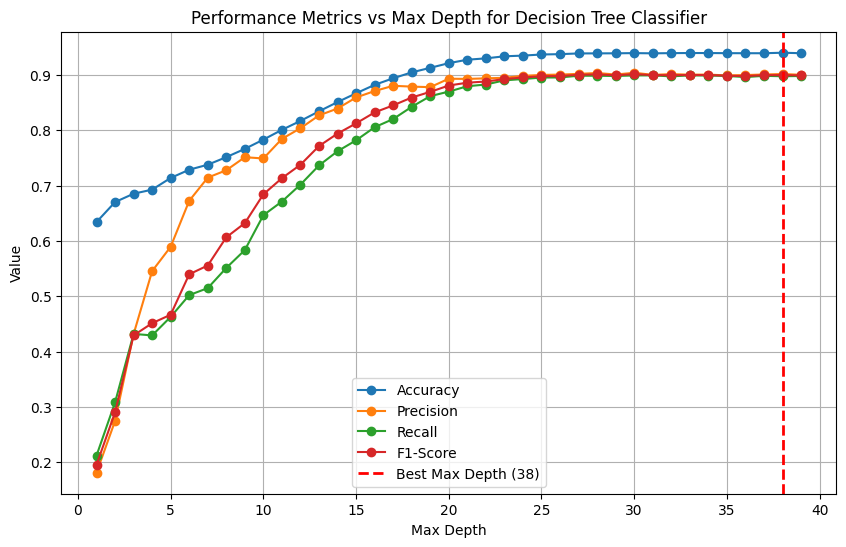

In [72]:
# Xác định features và target variable
X_Trs = data_nor.drop('Cover_Type', axis=1)
y_Trs = data_nor['Cover_Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% dữ liệu huấn luyện, 20% dữ liệu kiểm tra)
X_train_Trs, X_test_Trs, y_train_Trs, y_test_Trs = train_test_split(X_Trs, y_Trs, test_size=0.2, random_state=42)
# Initialize lists to store metric values for different max_depth values
max_depth_values = range(1, 40)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_max_depth = None  # Variable to store the best max_depth
best_accuracy = 0.0  # Variable to store the best accuracy

# Loop through different max_depth values
for max_depth in max_depth_values:
    # Create and fit a DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train_Trs, y_train_Trs)
    
    # Make predictions on the test set
    y_pred_Trs = clf.predict(X_test_Trs)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_Trs, y_pred_Trs)
    precision = precision_score(y_test_Trs, y_pred_Trs, average='macro') #tính toán độ chính xác riêng lẻ cho từng lớp
    recall = recall_score(y_test_Trs, y_pred_Trs, average='macro')
    f1 = f1_score(y_test_Trs, y_pred_Trs, average='macro')
    
    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Check if the current max_depth gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth


DTC_Model = DecisionTreeClassifier(max_depth=best_max_depth)
DTC_Model.fit(X_train_Trs, y_train_Trs)

# Print the best max_depth and its corresponding accuracy
print(f"Best Max Depth: {best_max_depth}")
print(f"Best Accuracy: {best_accuracy}")

# Create a single plot with multiple lines for each metric
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, accuracy_values, marker='o', label='Accuracy', linestyle='-')
plt.plot(max_depth_values, precision_values, marker='o', label='Precision', linestyle='-')
plt.plot(max_depth_values, recall_values, marker='o', label='Recall', linestyle='-')
plt.plot(max_depth_values, f1_values, marker='o', label='F1-Score', linestyle='-')
plt.title('Performance Metrics vs Max Depth for Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Highlight the best max_depth with a red vertical line
plt.axvline(x=best_max_depth, color='r', linestyle='--', label=f'Best Max Depth ({best_max_depth})', linewidth=2)
plt.legend()

plt.show()




In [73]:
model_filename = "DecisionTreeClassifier_40.pkl"
joblib.dump(DTC_Model, model_filename)

['DecisionTreeClassifier_40.pkl']

In [105]:
DTC_Model = joblib.load('DecisionTreeClassifier_100_30_10.pkl')

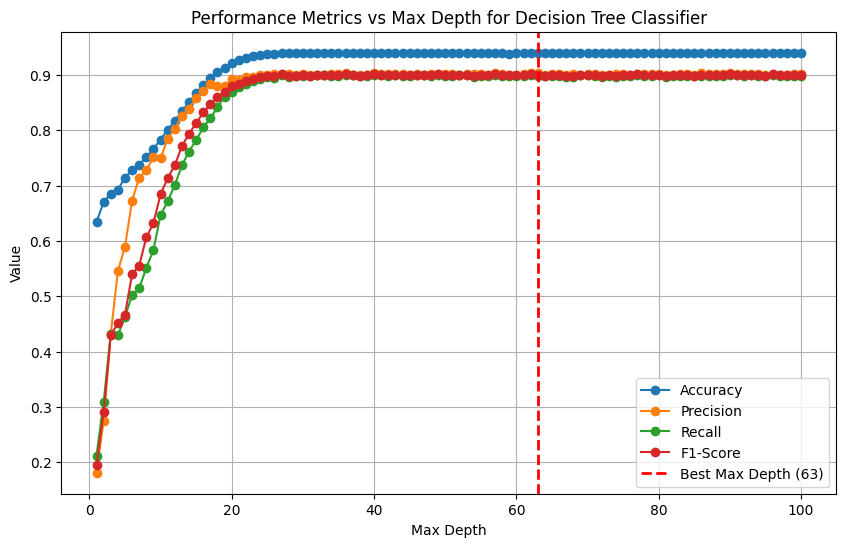

In [125]:
Image('DT_30_10.png')

In [127]:
y_pred_Trs = DTC_Model.predict(X_test_Trs)
accuracy = accuracy_score(y_test_Trs, y_pred_Trs)
report = classification_report(y_test_Trs, y_pred_Trs)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9393905492973503
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.83      1995
           1       0.85      0.82      0.83       526
           2       0.88      0.87      0.87      3489
           3       0.95      0.95      0.95      4015
           4       0.95      0.95      0.95     56500
           5       0.93      0.93      0.93      7121
           6       0.94      0.94      0.94     42557

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



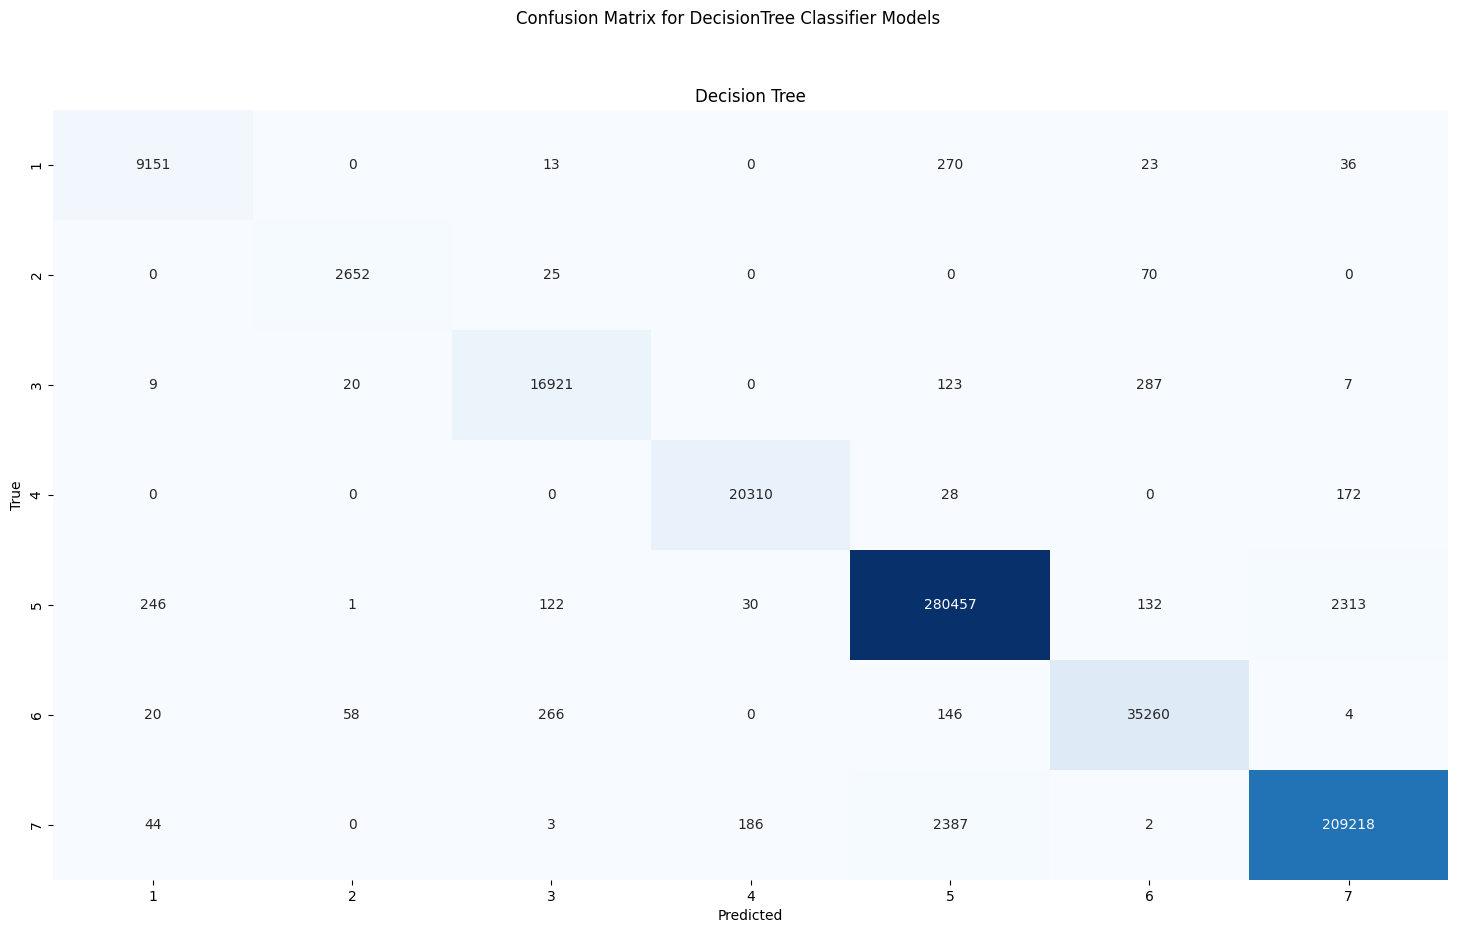

In [128]:
# Tạo confusion matrix cho từng mô hình
pre_rows = data_nor
X_PRE = pre_rows.drop('Cover_Type', axis=1)
Y_PRE = pre_rows['Cover_Type']

DTC_predictions = DTC_Model.predict(X_PRE)
DTC_cm = confusion_matrix(Y_PRE, DTC_predictions)

# Tạo DataFrame từ confusion matrix
DTC_cm_df = pd.DataFrame(DTC_cm, index=range(1, 8), columns=range(1, 8))

# Vẽ confusion matrix sử dụng seaborn
plt.figure(figsize=(18, 10))  # Thay đổi kích thước của toàn bộ biểu đồ
plt.suptitle('Confusion Matrix for DecisionTree Classifier Models')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Tăng margin giữa các biểu đồ

sns.heatmap(DTC_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree")
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

                              Feature  Importance
0                           Elevation    0.348135
2  Horizontal_Distance_To_Fire_Points    0.180830
1     Horizontal_Distance_To_Roadways    0.170357
6                           Soil_Type    0.115994
4               Distance_To_Hydrology    0.090976
3                       Avg_Hillshade    0.060643
5                     Wilderness_Area    0.033065


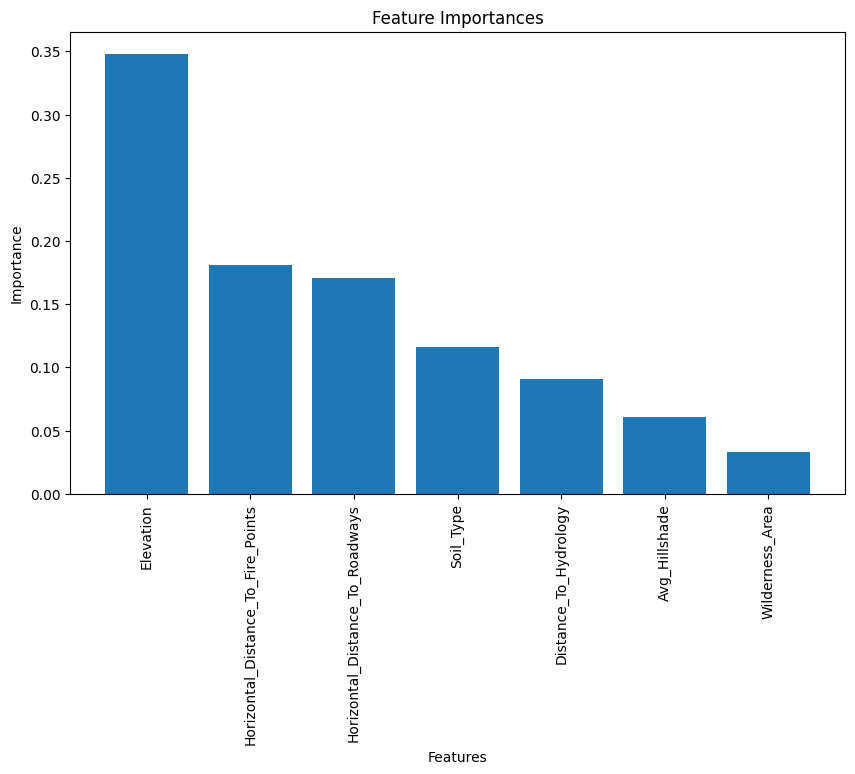

In [129]:
importances = DTC_Model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_PRE.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


# **KNeighborsClassifier**

In [226]:
# Xác định features và target variable
X_knn = data_nor.drop('Cover_Type', axis=1)
y_knn = data_nor['Cover_Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% dữ liệu huấn luyện, 20% dữ liệu kiểm tra)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.2, random_state=42)

In [231]:
X_train_knn.shape, X_test_knn.shape

((464809, 7), (116203, 7))

n_neighbors:1 with accuracy:0.9418861819402253
n_neighbors:2 with accuracy:0.9331428620603599
n_neighbors:3 with accuracy:0.9401048165710008
n_neighbors:4 with accuracy:0.9346316360162819
n_neighbors:5 with accuracy:0.9364904520537336
n_neighbors:6 with accuracy:0.9327900312384362
n_neighbors:7 with accuracy:0.9319983132965586
n_neighbors:8 with accuracy:0.9287195683416091
n_neighbors:9 with accuracy:0.9285388501157458
Best N_neighbors: 1
Best Accuracy: 0.9418861819402253


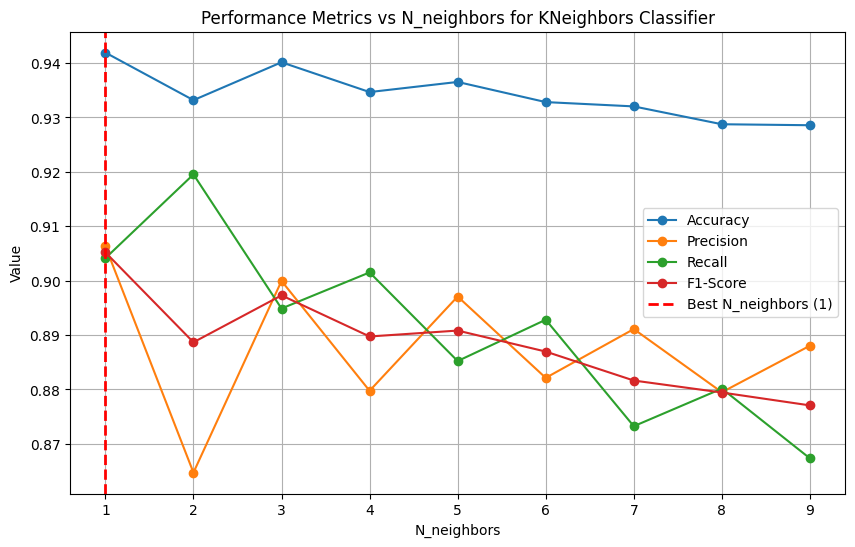

In [112]:
# Initialize lists to store metric values for different max_depth values
n_neighbors_values = range(1, 10)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_neighbors = None  # Variable to store the best max_depth
best_accuracy = 0.0  # Variable to store the best accuracy

# Loop through different max_depth values
for n_neighbors in n_neighbors_values:
    # Create and fit a DecisionTreeClassifier with the current max_depth
    KNN_Model = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNN_Model.fit(X_train_knn, y_train_knn)
    
    # Make predictions on the test set
    y_pred_knn = KNN_Model.predict(X_test_knn)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_knn, y_pred_knn)
    precision = precision_score(y_test_knn, y_pred_knn, average='macro')
    recall = recall_score(y_test_knn, y_pred_knn, average='macro')
    f1 = f1_score(y_test_knn, y_pred_knn, average='macro')
    
    print(f"n_neighbors:{n_neighbors} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Check if the current max_depth gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = n_neighbors


KNN_Model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
KNN_Model.fit(X_train_knn, y_train_knn)

# Print the best n_neighbors and its corresponding accuracy
print(f"Best N_neighbors: {best_n_neighbors}")
print(f"Best Accuracy: {best_accuracy}")

# Create a single plot with multiple lines for each metric
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, accuracy_values, marker='o', label='Accuracy', linestyle='-')
plt.plot(n_neighbors_values, precision_values, marker='o', label='Precision', linestyle='-')
plt.plot(n_neighbors_values, recall_values, marker='o', label='Recall', linestyle='-')
plt.plot(n_neighbors_values, f1_values, marker='o', label='F1-Score', linestyle='-')
plt.title('Performance Metrics vs N_neighbors for KNeighbors Classifier')
plt.xlabel('N_neighbors')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Highlight the best n_neighbors with a red vertical line
plt.axvline(x=best_n_neighbors, color='r', linestyle='--', label=f'Best N_neighbors ({best_n_neighbors})', linewidth=2)
plt.legend()

plt.show()




In [114]:
model_filename = "KNeighborsClassifier_10.pkl"
joblib.dump(KNN_Model, model_filename)

['KNeighborsClassifier_10.pkl']

In [232]:
KNN_Model = joblib.load('knn_model_50_30_10.pkl')

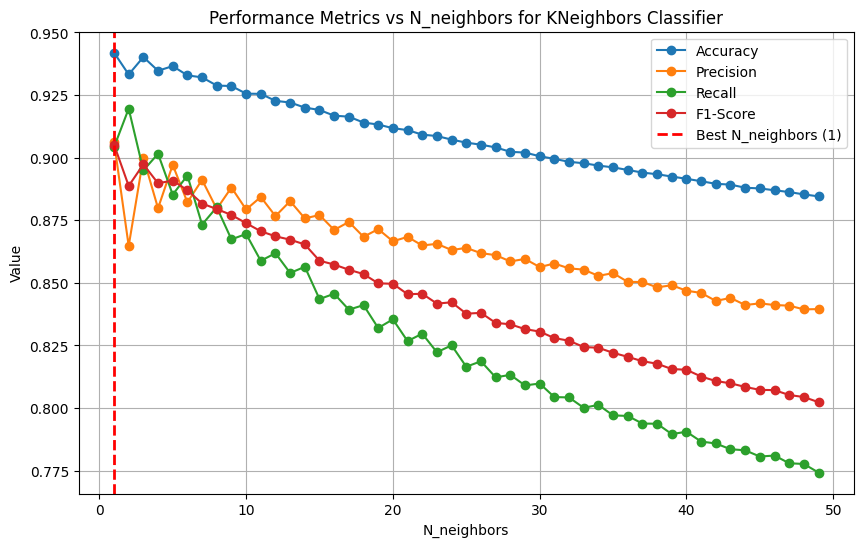

In [182]:
Image("knn_50_30_10.png")

In [7]:
print(KNN_Model.n_neighbors)

1


In [116]:
y_pred_knn = KNN_Model.predict(X_test_knn)
accuracy = accuracy_score(y_test_knn, y_pred_knn)
report = classification_report(y_test_knn, y_pred_knn)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9418861819402253
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1995
           1       0.86      0.84      0.85       526
           2       0.88      0.88      0.88      3489
           3       0.94      0.95      0.95      4015
           4       0.95      0.95      0.95     56500
           5       0.93      0.94      0.93      7121
           6       0.94      0.94      0.94     42557

    accuracy                           0.94    116203
   macro avg       0.91      0.90      0.91    116203
weighted avg       0.94      0.94      0.94    116203



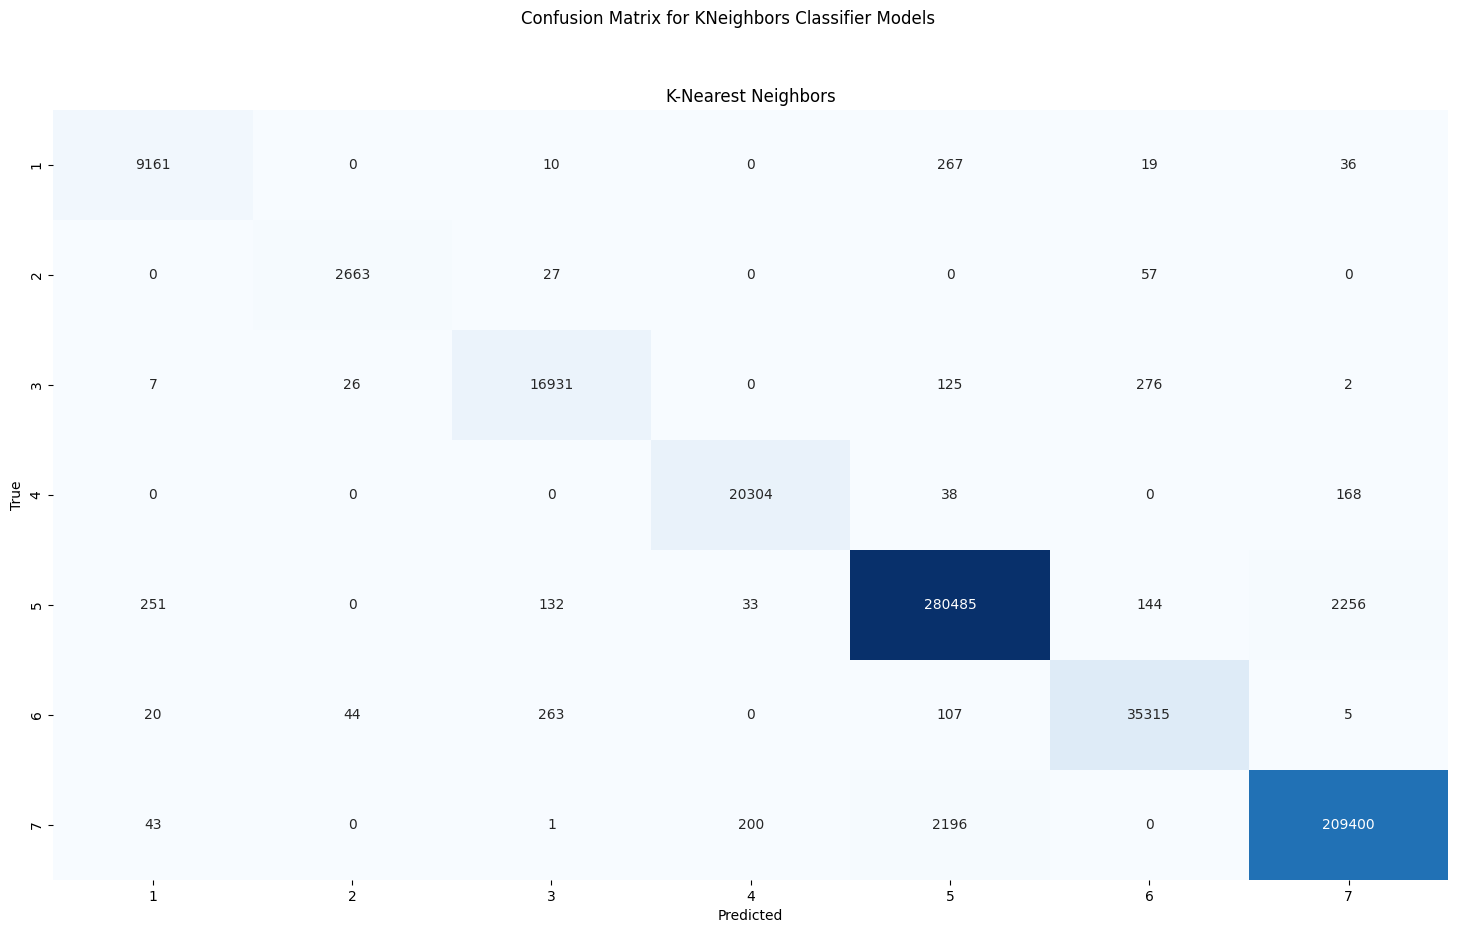

In [117]:
# Tạo confusion matrix cho từng mô hình
pre_rows = data_nor
X_PRE = pre_rows.drop('Cover_Type', axis=1)
Y_PRE = pre_rows['Cover_Type']

KNN_predictions = KNN_Model.predict(X_PRE)
KNN_cm = confusion_matrix(Y_PRE, KNN_predictions)

# Tạo DataFrame từ confusion matrix
KNN_cm_df = pd.DataFrame(KNN_cm, index=range(1, 8), columns=range(1, 8))

# Vẽ confusion matrix sử dụng seaborn
plt.figure(figsize=(18, 10))  # Thay đổi kích thước của toàn bộ biểu đồ
plt.suptitle('Confusion Matrix for KNeighbors Classifier Models')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Tăng margin giữa các biểu đồ

sns.heatmap(KNN_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("K-Nearest Neighbors")
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

[0.05385403130728128, 0.05212429971687482, 0.05483507310482516, -0.012762148997874423, 0.00792578504857877, 0.0019706892248909647, 0.017985766288305838]


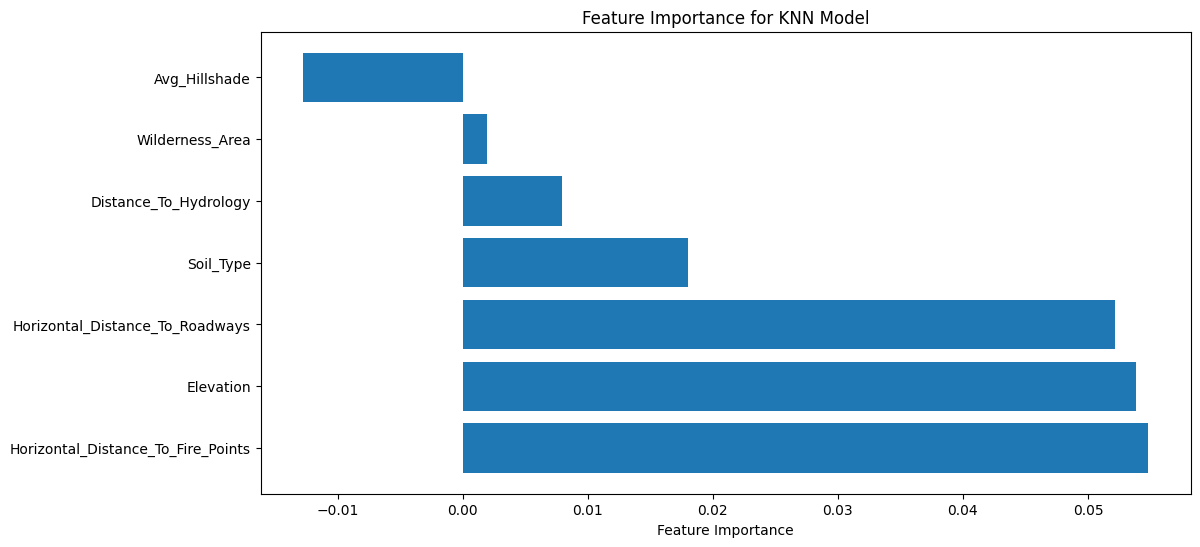

In [235]:
# Initialize lists to store feature importance values
feature_importances = []

# Đánh giá hiệu suất mô hình gốc
y_pred_knn = KNN_Model.predict(X_test_knn)
baseline_accuracy = accuracy_score(y_test_knn, y_pred_knn)

# Lặp qua từng đặc trưng để tính độ quan trọng
for feature in X_train_knn.columns:
    X_train_temp = X_train_knn.drop(feature, axis=1)
    X_test_temp = X_test_knn.drop(feature, axis=1)
    
    # Tạo mô hình KNN tạm thời sau khi loại bỏ đặc trưng
    knn_temp = KNeighborsClassifier(n_neighbors=KNN_Model.n_neighbors)  # Tạo một mô hình mới
    knn_temp.fit(X_train_temp, y_train_knn)
    
    # Đánh giá hiệu suất sau khi loại bỏ đặc trưng
    y_pred_temp = knn_temp.predict(X_test_temp)
    accuracy_temp = accuracy_score(y_test_knn, y_pred_temp)
    
    # Độ quan trọng của đặc trưng được tính bằng sự thay đổi trong hiệu suất
    feature_importances.append(baseline_accuracy - accuracy_temp)

# Sắp xếp độ quan trọng của đặc trưng và tên đặc trưng tương ứng
importances, features = zip(*sorted(zip(feature_importances, X_train_knn.columns), reverse=True))

print(feature_importances)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(features)), importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for KNN Model')
plt.show()

# **RandomForest Classifier**

In [98]:
# Xác định features và target variable
X_Rf = data_nor.drop('Cover_Type', axis=1)
y_Rf = data_nor['Cover_Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% dữ liệu huấn luyện, 20% dữ liệu kiểm tra)
X_train_Rf, X_test_Rf, y_train_Rf, y_test_Rf = train_test_split(X_Rf, y_Rf, test_size=0.2, random_state=42)

In [99]:
X_train_Rf.shape, X_test_Rf.shape

((464809, 7), (116203, 7))

n_estimators:1 with accuracy:0.9004242575492888
n_estimators:2 with accuracy:0.9021798060291042
n_estimators:3 with accuracy:0.9366711702795969
n_estimators:4 with accuracy:0.9386418595044879
n_estimators:5 with accuracy:0.9477724327254891
n_estimators:6 with accuracy:0.9478240665043072
n_estimators:7 with accuracy:0.9520408251077855
n_estimators:8 with accuracy:0.9522387545932549
n_estimators:9 with accuracy:0.954786021014948
n_estimators:10 with accuracy:0.9549753448706143
n_estimators:11 with accuracy:0.9562575837112639
n_estimators:12 with accuracy:0.9568685834272781
n_estimators:13 with accuracy:0.957797991446004
n_estimators:14 with accuracy:0.9581766391573368
n_estimators:15 with accuracy:0.9588392726521691
n_estimators:16 with accuracy:0.9590113852482294
n_estimators:17 with accuracy:0.9595965680748345
n_estimators:18 with accuracy:0.9597858919305009
Best n_estimators: 18
Best Accuracy: 0.9597858919305009


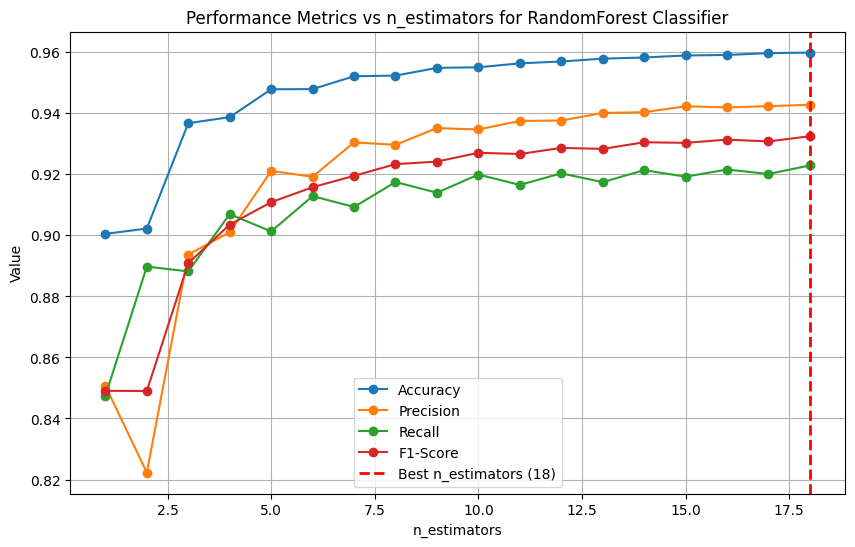

In [104]:
# Initialize lists to store metric values for different max_depth values
n_estimators_values = range(1, 19)
accuracy_values = []
precision_values = []
recall_values = []
f1_values = []

best_n_estimators = None  # Variable to store the best n_estimators
best_accuracy = 0.0  # Variable to store the best accuracy

# Loop through different max_depth values
for n_estimators in n_estimators_values:
    # Create and fit a RandomForestClassifier with the current n_estimators
    RFC_Model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    RFC_Model.fit(X_train_Rf, y_train_Rf)
    
    # Make predictions on the test set
    y_pred_Rf = RFC_Model.predict(X_test_Rf)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_Rf, y_pred_Rf)
    precision = precision_score(y_test_Rf, y_pred_Rf, average='macro')
    recall = recall_score(y_test_Rf, y_pred_Rf, average='macro')
    f1 = f1_score(y_test_Rf, y_pred_Rf, average='macro')
    
    print(f"n_estimators:{n_estimators} with accuracy:{accuracy}")

    accuracy_values.append(accuracy)
    precision_values.append(precision)
    recall_values.append(recall)
    f1_values.append(f1)
    
    # Check if the current max_depth gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_estimators = n_estimators


RFC_Model = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
RFC_Model.fit(X_train_Rf, y_train_Rf)

# Print the best n_estimators and its corresponding accuracy
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best Accuracy: {best_accuracy}")

# Create a single plot with multiple lines for each metric
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_values, marker='o', label='Accuracy', linestyle='-')
plt.plot(n_estimators_values, precision_values, marker='o', label='Precision', linestyle='-')
plt.plot(n_estimators_values, recall_values, marker='o', label='Recall', linestyle='-')
plt.plot(n_estimators_values, f1_values, marker='o', label='F1-Score', linestyle='-')
plt.title('Performance Metrics vs n_estimators for RandomForest Classifier')
plt.xlabel('n_estimators')
plt.ylabel('Value')
plt.grid(True)
plt.legend()

# Highlight the best n_estimators with a red vertical line
plt.axvline(x=best_n_estimators, color='r', linestyle='--', label=f'Best n_estimators ({best_n_estimators})', linewidth=2)
plt.legend()

plt.show()




In [107]:
model_filename = "RandomForestClassifier_200.pkl"
joblib.dump(RFC_Model, model_filename)

['RandomForestClassifier_200.pkl']

In [175]:
RFC_Model = joblib.load('RandomForestClassifier_100_30_10.pkl')

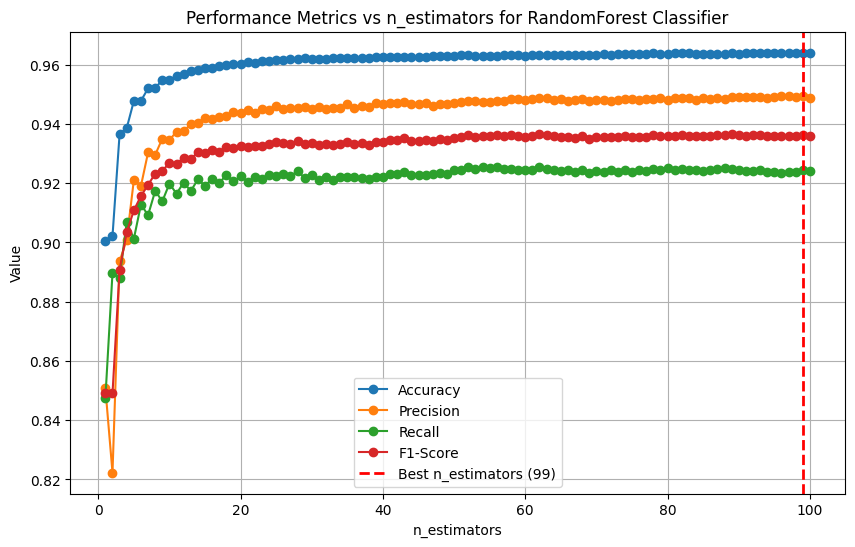

In [176]:
Image("RFC_30_10.png")

In [109]:
y_pred_Rf = RFC_Model.predict(X_test_Rf)
accuracy = accuracy_score(y_test_Rf, y_pred_Rf)
report = classification_report(y_test_Rf, y_pred_Rf)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.9597858919305009
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.87      1995
           1       0.91      0.85      0.88       526
           2       0.93      0.93      0.93      3489
           3       0.97      0.96      0.96      4015
           4       0.96      0.97      0.97     56500
           5       0.95      0.96      0.96      7121
           6       0.97      0.95      0.96     42557

    accuracy                           0.96    116203
   macro avg       0.94      0.92      0.93    116203
weighted avg       0.96      0.96      0.96    116203



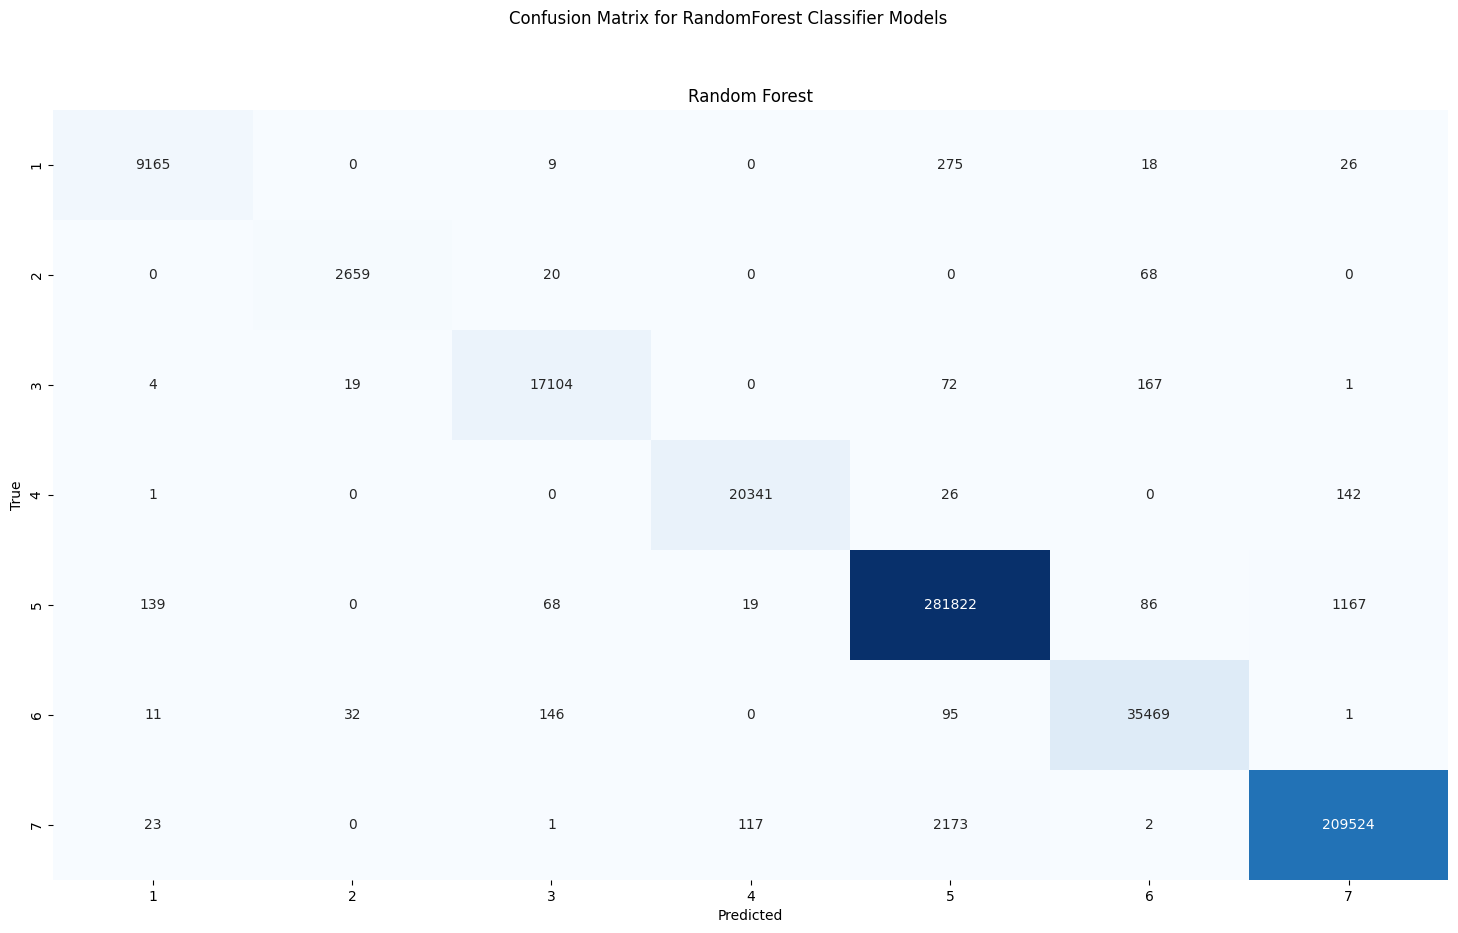

In [113]:
# Tạo confusion matrix cho từng mô hình
pre_rows = data_nor
X_PRE = pre_rows.drop('Cover_Type', axis=1)
Y_PRE = pre_rows['Cover_Type']

RFC_predictions = RFC_Model.predict(X_PRE)
RFC_cm = confusion_matrix(Y_PRE, RFC_predictions)

# Tạo DataFrame từ confusion matrix
RFC_cm_df = pd.DataFrame(RFC_cm, index=range(1, 8), columns=range(1, 8))

# Vẽ confusion matrix sử dụng seaborn
plt.figure(figsize=(18, 10))  # Thay đổi kích thước của toàn bộ biểu đồ
plt.suptitle('Confusion Matrix for RandomForest Classifier Models')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Tăng margin giữa các biểu đồ

sns.heatmap(RFC_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

                              Feature  Importance
0                           Elevation    0.298762
1     Horizontal_Distance_To_Roadways    0.171846
2  Horizontal_Distance_To_Fire_Points    0.159007
6                           Soil_Type    0.129664
4               Distance_To_Hydrology    0.095268
3                       Avg_Hillshade    0.079932
5                     Wilderness_Area    0.065520


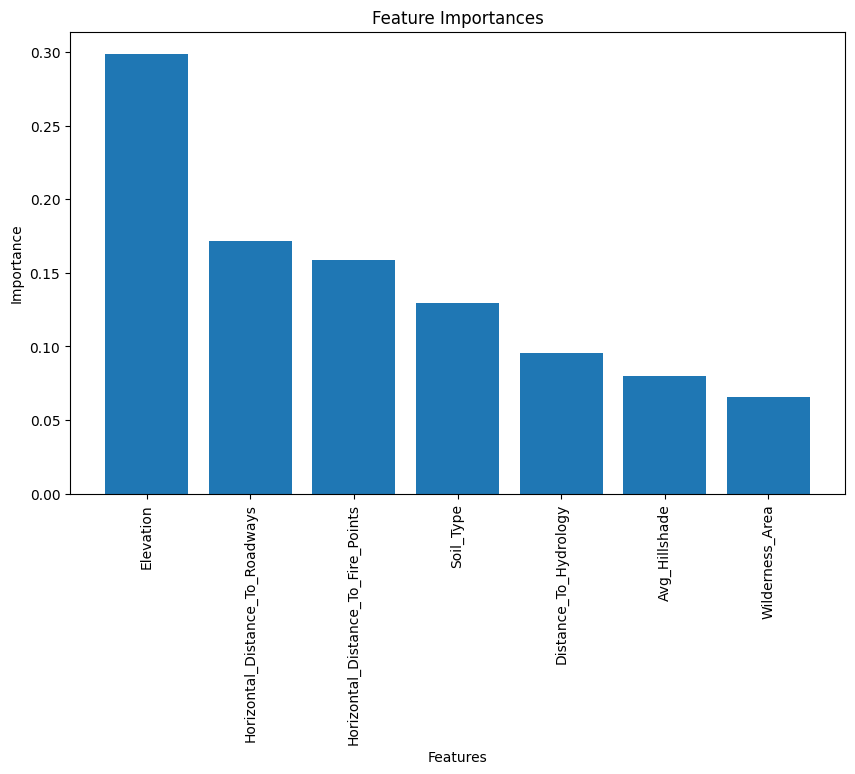

In [114]:
importances = RFC_Model.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_PRE.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
print(feature_importances_df)
plt.figure(figsize=(10,6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# **Artificial Neural Network (ANN)**

In [29]:
# Xác định features và target variable
X_ann = data_nor.drop('Cover_Type', axis=1)
y_ann = data_nor['Cover_Type']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ví dụ: 80% dữ liệu huấn luyện, 20% dữ liệu kiểm tra)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(X_ann, y_ann, test_size=0.2, random_state=42)

In [9]:
X_train_ann.shape, X_test_ann.shape

((464809, 7), (116203, 7))

Epoch 1/5
14526/14526 [==============================] - 27s 2ms/step - loss: 0.6268 - accuracy: 0.7340 - val_loss: 0.5465 - val_accuracy: 0.7710
Epoch 2/5
14526/14526 [==============================] - 26s 2ms/step - loss: 0.5205 - accuracy: 0.7788 - val_loss: 0.4952 - val_accuracy: 0.7912
Epoch 3/5
14526/14526 [==============================] - 26s 2ms/step - loss: 0.4799 - accuracy: 0.7964 - val_loss: 0.4681 - val_accuracy: 0.7986
Epoch 4/5
14526/14526 [==============================] - 26s 2ms/step - loss: 0.4540 - accuracy: 0.8077 - val_loss: 0.4414 - val_accuracy: 0.8136
Epoch 5/5
14526/14526 [==============================] - 26s 2ms/step - loss: 0.4355 - accuracy: 0.8154 - val_loss: 0.4311 - val_accuracy: 0.8172


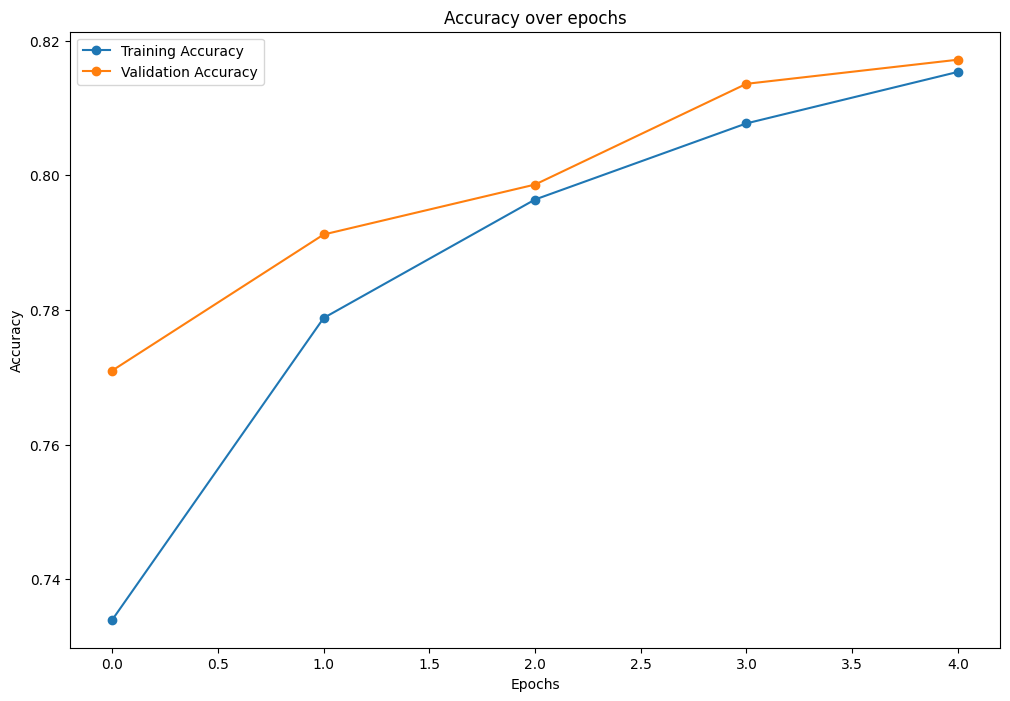

3632/3632 [==============================] - 5s 1ms/step - loss: 0.4311 - accuracy: 0.8172
Độ chính xác (Accuracy): 0.8171820044517517


In [18]:

# Giới hạn giá trị của cột 'Cover_Type' trong khoảng từ 1 đến 7
y_train_ann = y_train_ann.clip(1, 7)
y_test_ann = y_test_ann.clip(1, 7)

# Chuyển đổi cột 'Cover_Type' thành one-hot encoding
y_train_encoded = keras.utils.to_categorical(y_train_ann, num_classes=7).astype(int)
y_test_encoded = keras.utils.to_categorical(y_test_ann, num_classes=7).astype(int)


# Xây dựng mô hình ANN với hàm mất mát 'categorical_crossentropy'
model = keras.Sequential([
    layers.Input(shape=(X_train_ann.shape[1],)),  # Số chiều của dữ liệu đầu vào
    layers.Dense(128, activation='relu'),  # Lớp ẩn 1 với 128 neurons và hàm kích hoạt ReLU
    layers.Dense(64, activation='relu'),  # Lớp ẩn 2 với 64 neurons và hàm kích hoạt ReLU
    layers.Dense(7, activation='softmax')  # Lớp đầu ra với 7 neurons và hàm kích hoạt softmax
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình và lưu lại lịch sử
history = model.fit(X_train_ann, y_train_encoded, epochs= 5, batch_size=32, validation_data=(X_test_ann, y_test_encoded))

# Lấy ra độ chính xác từ lịch sử
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Tạo biểu đồ
plt.figure(figsize=(12, 8))
plt.plot(train_acc, marker='o',label='Training Accuracy', linestyle='-')
plt.plot(val_acc, marker='o',label='Validation Accuracy', linestyle='-')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# Đánh giá mô hình trên tập kiểm tra
loss, accuracy = model.evaluate(X_test_ann, y_test_encoded)
print(f"Độ chính xác (Accuracy): {accuracy}")


In [19]:
model.save('ANN_Model_150_kera.h5')

In [116]:
ANN_Model = load_model('ANN_Model_150_kera_30_10.h5')

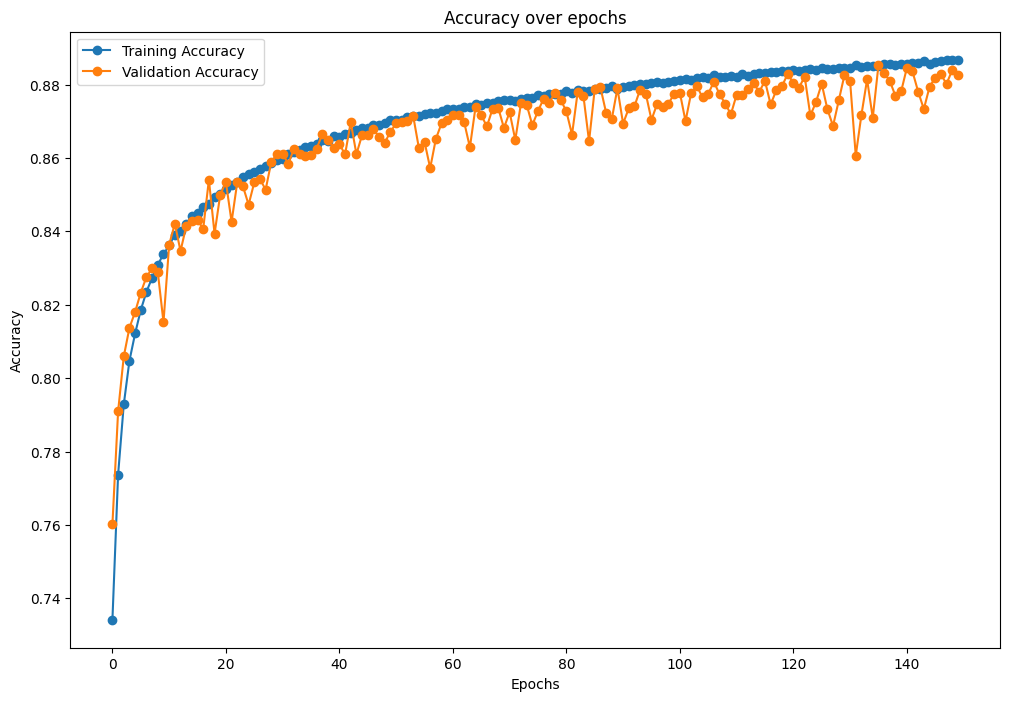

In [124]:
Image('ANNs150_30_10.png')

In [117]:
y_pred_ann = ANN_Model.predict(X_test_ann)
# Chọn lớp có xác suất cao nhất làm dự đoán cuối cùng
y_pred = np.argmax(y_pred_ann, axis=1)   # +1 để đảm bảo dự đoán từ 1 đến 7

# Tính độ chính xác
accuracy = accuracy_score(y_test_ann, y_pred)

# In độ chính xác và báo cáo phân loại
print(f"Accuracy: {accuracy}")
report = classification_report(y_test_ann, y_pred)
print("Classification Report:\n", report)

3632/3632 [==============================] - 5s 1ms/step
Accuracy: 0.882481519409998
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.75      1995
           1       0.89      0.58      0.70       526
           2       0.78      0.80      0.79      3489
           3       0.91      0.84      0.87      4015
           4       0.91      0.89      0.90     56500
           5       0.88      0.91      0.89      7121
           6       0.86      0.89      0.88     42557

    accuracy                           0.88    116203
   macro avg       0.86      0.81      0.83    116203
weighted avg       0.88      0.88      0.88    116203



18157/18157 [==============================] - 23s 1ms/step


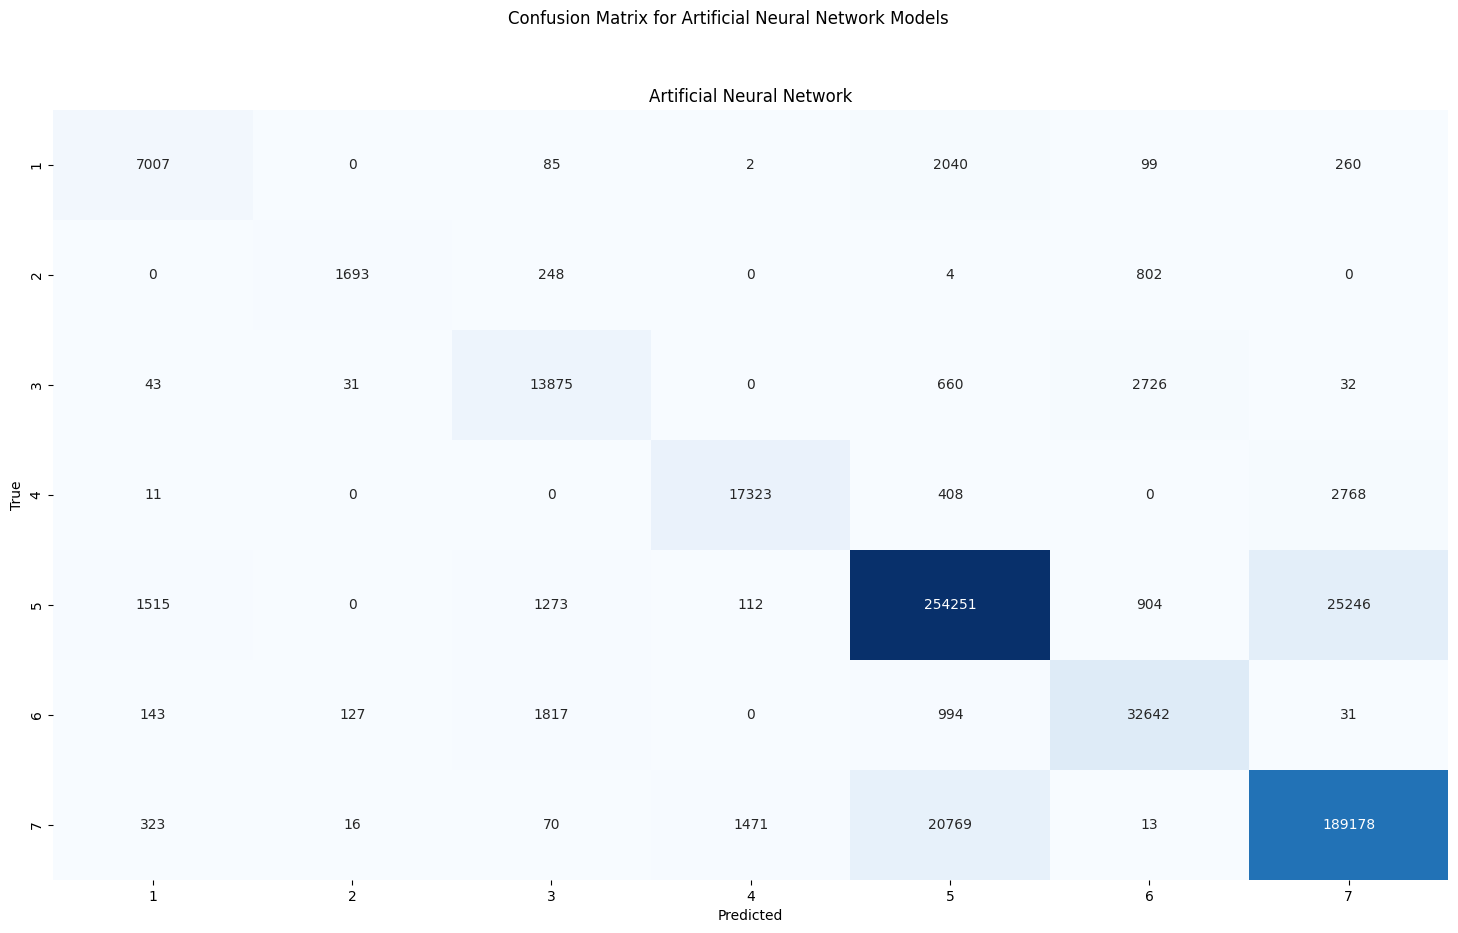

In [119]:
# Tạo confusion matrix cho từng mô hình
pre_rows = data_nor
X_PRE = pre_rows.drop('Cover_Type', axis=1)
Y_PRE = pre_rows['Cover_Type']

ANN_predictions = ANN_Model.predict(X_PRE)
ANN_predictions = np.argmax(ANN_predictions, axis=1)
ANN_cm = confusion_matrix(Y_PRE, ANN_predictions)

# Tạo DataFrame từ confusion matrix
ANN_cm_df = pd.DataFrame(ANN_cm, index=range(1, 8), columns=range(1, 8))

# Vẽ confusion matrix sử dụng seaborn
plt.figure(figsize=(18, 10))  # Thay đổi kích thước của toàn bộ biểu đồ
plt.suptitle('Confusion Matrix for Artificial Neural Network Models')

plt.subplots_adjust(wspace=0.4, hspace=0.4)  # Tăng margin giữa các biểu đồ

sns.heatmap(ANN_cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Artificial Neural Network")
plt.xlabel('Predicted')
plt.ylabel('True')


plt.show()

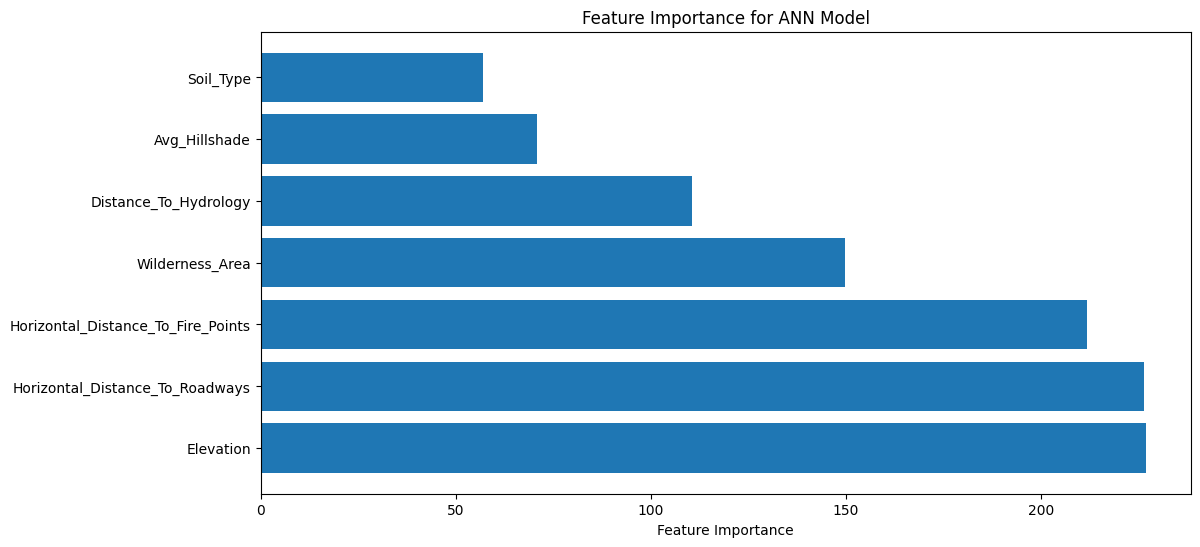

In [120]:
# Get the weights of the input layer
input_layer_weights = ANN_Model.layers[0].get_weights()[0]

# Calculate the feature importance scores as the absolute sum of weights for each feature
feature_importances = np.sum(np.abs(input_layer_weights), axis=1)

# Get the feature names from your X_ann DataFrame
feature_names = X_ann.columns

# Sort feature importances and feature names together
sorted_feature_importances, sorted_feature_names = zip(*sorted(zip(feature_importances, feature_names), reverse=True))

# Create a bar plot to visualize feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for ANN Model')
plt.show()